In [1]:
import argparse
from random import randint
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import torch
from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from data_preprocessing import Predictor1_Dataset
from discharge_model import Predictor_1
from utils import *

In [2]:
def get_args_parser():
    parser = argparse.ArgumentParser('Predictor1 training', add_help=False)
    parser.add_argument('--batch_size', default=32, type=int)
    parser.add_argument('--epochs', default=50, type=int)

    # Model parameters
    parser.add_argument('--model_name', default='Predictor_1', type=str) 
    parser.add_argument('--finetune', default=False, type=bool)   
    parser.add_argument('--load_checkpoint', default='predictor1_best_model.pth', type=str)                  

    # Optimizer parameters
    parser.add_argument('--weight_decay', type=float, default=5)
    parser.add_argument('--lr', type=float, default=1e-4, metavar='LR')
    parser.add_argument('--lr_schedule', type=bool, default=False, metavar='LR')
    parser.add_argument('--min_lr', type=float, default=1e-5, metavar='LR')
    parser.add_argument('--warm_up', type=int, default=10, metavar='LR')
    parser.add_argument('--delta', type=int, default=1)
    return parser

 -- GPU is available -- 
92 23
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 100]           5,696
              Mish-2              [-1, 64, 100]               0
            Conv1d-3             [-1, 128, 100]          57,472
              Mish-4             [-1, 128, 100]               0
            Conv1d-5             [-1, 256, 100]         164,096
              Mish-6             [-1, 256, 100]               0
    SpatialDropout-7             [-1, 256, 100]               0
         AvgPool1d-8              [-1, 256, 50]               0
            Conv1d-9               [-1, 64, 50]         180,288
             Mish-10               [-1, 64, 50]               0
           Conv1d-11               [-1, 64, 50]         114,752
             Mish-12               [-1, 64, 50]               0
          Sigmoid-13               [-1, 50, 50]               0
Adaptive

epoch:[12 / 50] batch:[51 / 287] loss= 0.177 lr= 1.00e-04
epoch:[12 / 50] batch:[101 / 287] loss= 0.162 lr= 1.00e-04
epoch:[12 / 50] batch:[151 / 287] loss= 0.130 lr= 1.00e-04
epoch:[12 / 50] batch:[201 / 287] loss= 0.128 lr= 1.00e-04
epoch:[12 / 50] batch:[251 / 287] loss= 0.199 lr= 1.00e-04
trn_loss: 0.080, val_loss: 0.135
training set RMSE 1 cycle: 125, 20 cycle: 95, 100 cycle: 88
testing set RMSE 1 cycle: 153, 20 cycle: 134, 100 cycle: 114
epoch:[13 / 50] batch:[1 / 287] loss= 0.203 lr= 1.00e-04
epoch:[13 / 50] batch:[51 / 287] loss= 0.197 lr= 1.00e-04
epoch:[13 / 50] batch:[101 / 287] loss= 0.226 lr= 1.00e-04
epoch:[13 / 50] batch:[151 / 287] loss= 0.188 lr= 1.00e-04
epoch:[13 / 50] batch:[201 / 287] loss= 0.315 lr= 1.00e-04
epoch:[13 / 50] batch:[251 / 287] loss= 0.149 lr= 1.00e-04
trn_loss: 0.089, val_loss: 0.133
training set RMSE 1 cycle: 124, 20 cycle: 98, 100 cycle: 93
testing set RMSE 1 cycle: 151, 20 cycle: 133, 100 cycle: 113
epoch:[14 / 50] batch:[1 / 287] loss= 0.170 lr=

epoch:[28 / 50] batch:[151 / 287] loss= 0.153 lr= 1.00e-04
epoch:[28 / 50] batch:[201 / 287] loss= 0.127 lr= 1.00e-04
epoch:[28 / 50] batch:[251 / 287] loss= 0.127 lr= 1.00e-04
trn_loss: 0.076, val_loss: 0.146
training set RMSE 1 cycle: 126, 20 cycle: 94, 100 cycle: 85
testing set RMSE 1 cycle: 138, 20 cycle: 138, 100 cycle: 119
epoch:[29 / 50] batch:[1 / 287] loss= 0.162 lr= 1.00e-04
epoch:[29 / 50] batch:[51 / 287] loss= 0.153 lr= 1.00e-04
epoch:[29 / 50] batch:[101 / 287] loss= 0.105 lr= 1.00e-04
epoch:[29 / 50] batch:[151 / 287] loss= 0.119 lr= 1.00e-04
epoch:[29 / 50] batch:[201 / 287] loss= 0.150 lr= 1.00e-04
epoch:[29 / 50] batch:[251 / 287] loss= 0.167 lr= 1.00e-04
trn_loss: 0.073, val_loss: 0.132
training set RMSE 1 cycle: 125, 20 cycle: 94, 100 cycle: 84
testing set RMSE 1 cycle: 136, 20 cycle: 138, 100 cycle: 113
epoch:[30 / 50] batch:[1 / 287] loss= 0.181 lr= 1.00e-04
epoch:[30 / 50] batch:[51 / 287] loss= 0.112 lr= 1.00e-04
epoch:[30 / 50] batch:[101 / 287] loss= 0.137 lr=

epoch:[44 / 50] batch:[251 / 287] loss= 0.133 lr= 1.00e-04
trn_loss: 0.053, val_loss: 0.154
training set RMSE 1 cycle: 130, 20 cycle: 79, 100 cycle: 72
testing set RMSE 1 cycle: 159, 20 cycle: 145, 100 cycle: 122
epoch:[45 / 50] batch:[1 / 287] loss= 0.130 lr= 1.00e-04
epoch:[45 / 50] batch:[51 / 287] loss= 0.153 lr= 1.00e-04
epoch:[45 / 50] batch:[101 / 287] loss= 0.178 lr= 1.00e-04
epoch:[45 / 50] batch:[151 / 287] loss= 0.122 lr= 1.00e-04
epoch:[45 / 50] batch:[201 / 287] loss= 0.125 lr= 1.00e-04
epoch:[45 / 50] batch:[251 / 287] loss= 0.130 lr= 1.00e-04
trn_loss: 0.046, val_loss: 0.174
training set RMSE 1 cycle: 123, 20 cycle: 77, 100 cycle: 66
testing set RMSE 1 cycle: 166, 20 cycle: 161, 100 cycle: 130
epoch:[46 / 50] batch:[1 / 287] loss= 0.108 lr= 1.00e-04
epoch:[46 / 50] batch:[51 / 287] loss= 0.114 lr= 1.00e-04
epoch:[46 / 50] batch:[101 / 287] loss= 0.148 lr= 1.00e-04
epoch:[46 / 50] batch:[151 / 287] loss= 0.092 lr= 1.00e-04
epoch:[46 / 50] batch:[201 / 287] loss= 0.116 lr=

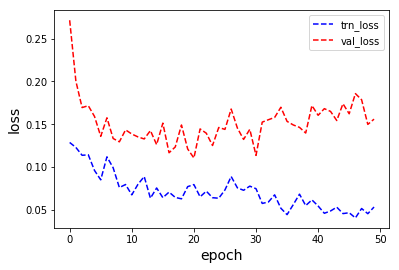

best RMSE: 103


In [3]:
args = get_args_parser()
args, unknown = args.parse_known_args()

if torch.cuda.is_available():
    print(" -- GPU is available -- ")

trn_set = Predictor1_Dataset(train=True, last_padding=False)
trn_loader = DataLoader(trn_set, batch_size=92, num_workers=0, drop_last=False, shuffle=False)
val_set = Predictor1_Dataset(train=False, last_padding=False)
val_loader = DataLoader(val_set, batch_size=23, num_workers=0, drop_last=False, shuffle=False)
trn_set_padding = Predictor1_Dataset(train=True, last_padding=True)
trn_loader_padding = DataLoader(trn_set_padding, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=True)
print(len(trn_set), len(val_set))

model = Predictor_1(8, 1, 0.25).apply(init_weights).cuda()
if args.finetune:
    model.load_state_dict(torch.load(args.load_checkpoint))
summary(model, (8, 100)) # architecture visualization

optimizer = optim.AdamW(model.parameters(), lr=args.lr, amsgrad=True, weight_decay=args.weight_decay)
criterion = nn.L1Loss()
loss_function  = nn.MSELoss()

best_rmse = 1000
trn_loss_record, val_loss_record = [], []
for epoch in range(args.epochs):
    model.train()
    batch = 0
    n_minibatch = (len(trn_set_padding)//args.batch_size)
    if args.lr_schedule:
        adjust_learning_rate(optimizer, args.epochs, epoch+1, args.warm_up, args.lr, args.min_lr)
    for inputs, targets in trn_loader_padding:
        batch += 1
        optimizer.zero_grad()
        output = model(inputs.cuda().float())
        loss = criterion(output, targets.reshape(-1, 2).cuda().float())
        loss.backward()
        optimizer.step()
        if batch%50==1:
            print('epoch:[%d / %d] batch:[%d / %d] loss= %.3f lr= %.2e' % 
                (epoch + 1, args.epochs, batch, n_minibatch, loss.mean(), optimizer.param_groups[0]["lr"]))

    # model evaluation per epoch
    model.eval()
    with torch.no_grad():
        trn_loss, val_loss = 0, 0
        for inputs, targets in trn_loader:
            output = model(inputs.cuda().float())
            loss = loss_function(output[:, 0] , targets[:, 0].cuda().float())
            trn_loss += loss.mean()
        for inputs, targets in val_loader:
            output = model(inputs.cuda().float())
            loss = loss_function(output[:, 0] , targets[:, 0].cuda().float())
            val_loss += loss.mean()
        trn_loss_record.append(trn_loss.cpu())
        val_loss_record.append(val_loss.cpu())
        print('trn_loss: %.3f, val_loss: %.3f' % ((trn_loss), (val_loss)))

    # inverse transform to real EOL
    trn_rmse, test_rmse = predictor1_model_evaluation(model, best_rmse, eval_length=[0, 19, 99])
    print('training set RMSE 1 cycle: %d, 20 cycle: %d, 100 cycle: %d' %
            (trn_rmse[0], trn_rmse[1], trn_rmse[2]))
    print('testing set RMSE 1 cycle: %d, 20 cycle: %d, 100 cycle: %d' %
            (test_rmse[0], test_rmse[1], test_rmse[2]))

    # save best testing loss      
    if test_rmse[2]<best_rmse:
        best_rmse = test_rmse[2]
        if args.finetune:
            torch.save(model.state_dict(), 'predictor1_finetuned.pth')
        else:
            torch.save(model.state_dict(), 'predictor1_best_model.pth')

# training finished
loss_profile(trn_loss_record, val_loss_record)
print('best RMSE: %d' % (best_rmse))